# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


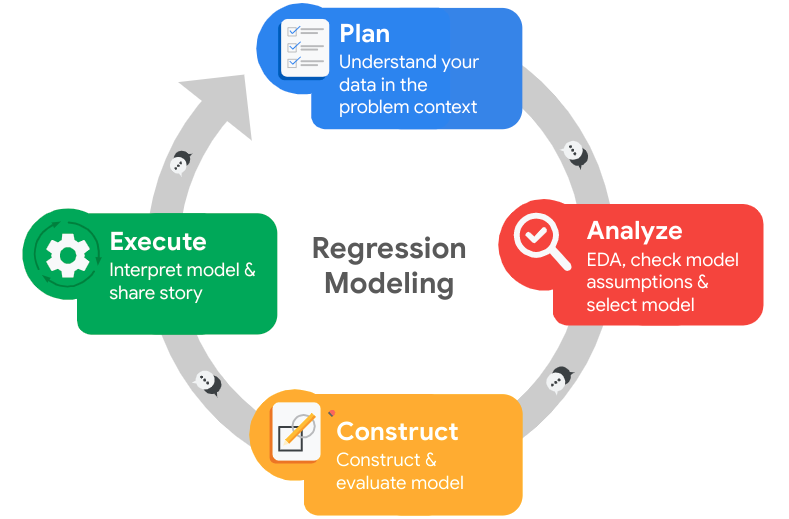

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stakeholders: HR Department and Senior Management at Salifort Motors for insights and action.

2. Predict employee attrition, identify key influencing factors, and provide actionable recommendations to improve retention for Salifort Motors.

3. The dataset (15,000 rows, 10 columns) is manageable. Key predictors may include satisfaction, time_spend_company, and salary, highlighting burnout, stagnation, or dissatisfaction as potential attrition drivers.

4. Tools: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, and SMOTE. References: Online course by Google - Advance Data Analytics.

5. Ensure anonymized data, avoid reinforcing biases, maintain transparency about model limitations.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)


### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df_dup = df[df.duplicated()]
df_dup

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean = df.drop_duplicates()

# Display first few rows of new dataframe as needed
df_clean.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

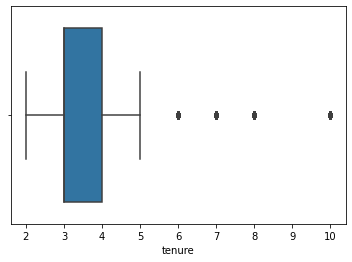

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df_clean, x=df['tenure'])


In [12]:
# Determine the number of rows containing outliers
q1 = df_clean['tenure'].quantile(.25)
q3 = df_clean['tenure'].quantile(.75)
iqr = q3 - q1
lower = iqr * q1 - 1.5
upper = iqr * q3 + 1.5
outliers_count = df_clean[(df_clean['tenure'] < lower) | (df_clean['tenure'] > upper)].shape[0]
print("Number of rows containing outliers in 'tenure':", outliers_count)

Number of rows containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
df_clean['left'].value_counts()
# Get percentages of people who left vs. stayed
df_clean['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
num_col = df_clean.select_dtypes(include=['int','float'])
cat_col = df_clean.select_dtypes(include='object')

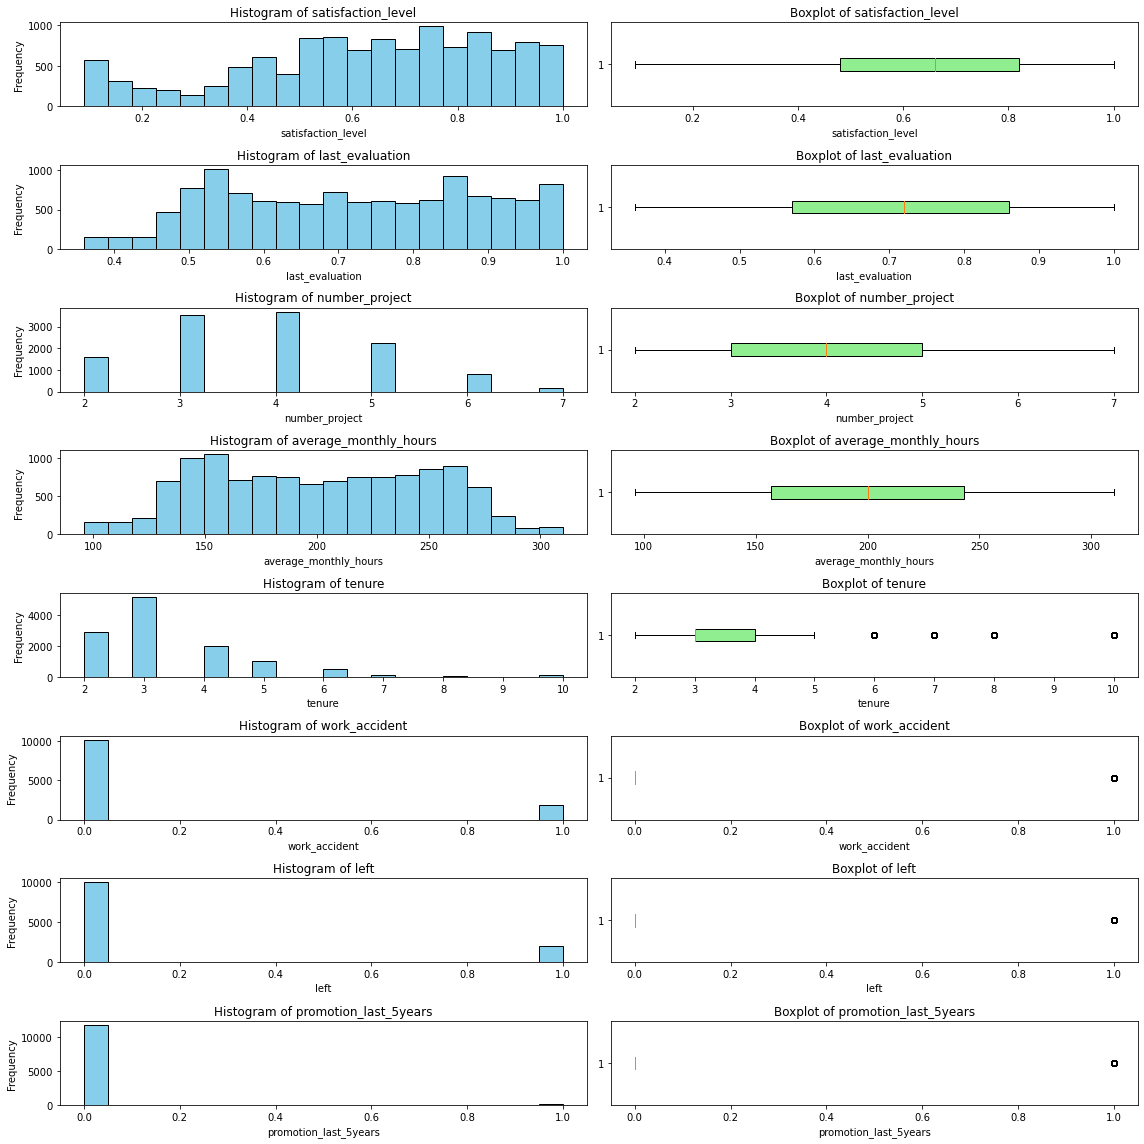

In [15]:
fig, axes = plt.subplots(8, 2, figsize=(16, 16))

for idx, col in enumerate(num_col):
    ax_hist = axes[idx, 0]
    ax_hist.hist(df_clean[col], bins=20, color='skyblue', edgecolor='black')
    ax_hist.set_title(f'Histogram of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')

    ax_box = axes[idx, 1]
    ax_box.boxplot(df_clean[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    ax_box.set_title(f'Boxplot of {col}')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()

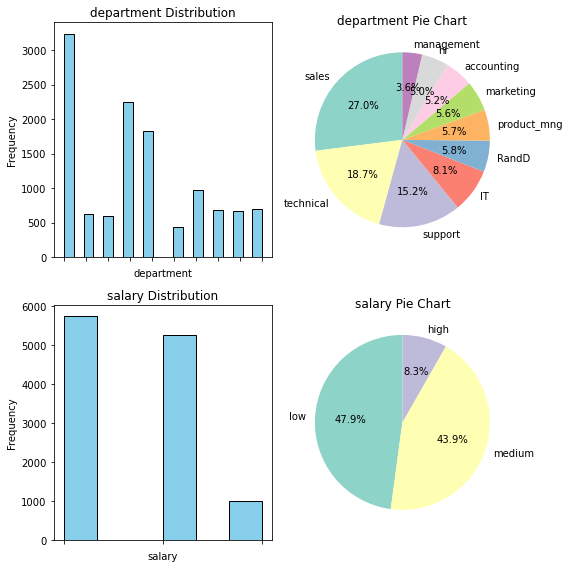

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


for idx, col in enumerate(cat_col):
    ax_hist = axes[idx, 0]  
    num_unique_values = len(df[col].unique())
    
    bins = min(num_unique_values * 2, 40)
    
    ax_hist.hist(df_clean[col], bins=bins, color='skyblue', edgecolor='black', zorder=3)
    ax_hist.set_title(f'{col} Distribution')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    ax_hist.set_xticklabels(ax_hist.get_xticklabels(), rotation=90)


    ax_pie = axes[idx, 1]
    counts = df_clean[col].value_counts()
    
    top_10_counts = counts.head(10)
    other_count = counts.iloc[10:].sum()
    
    pie_data = pd.concat([top_10_counts, pd.Series({'Other': other_count})])
    if pie_data['Other'] == 0:
        pie_data = pie_data.drop('Other')
    ax_pie.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(pie_data)))
    ax_pie.set_title(f'{col} Pie Chart')

plt.tight_layout()
plt.show()


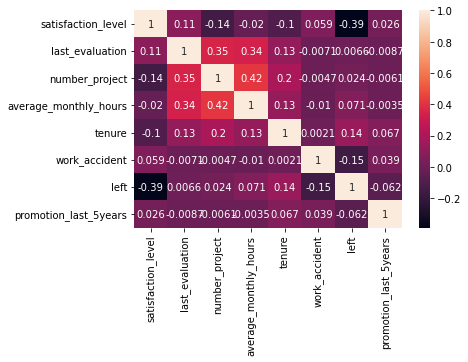

In [17]:
sns.heatmap(df.corr(), annot=True)

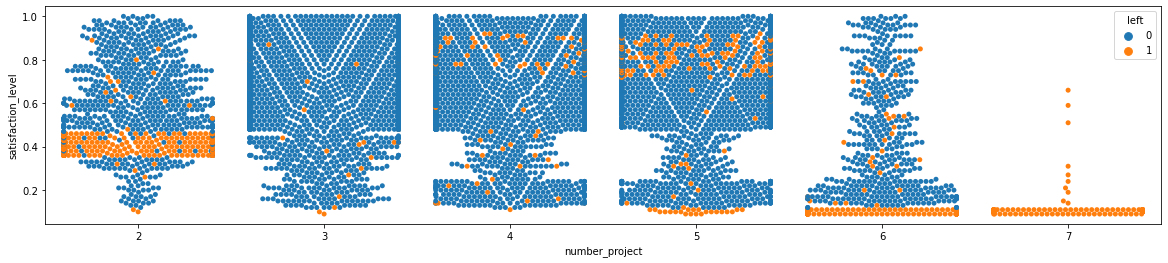

In [18]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_clean, x='number_project',y='satisfaction_level',hue='left')

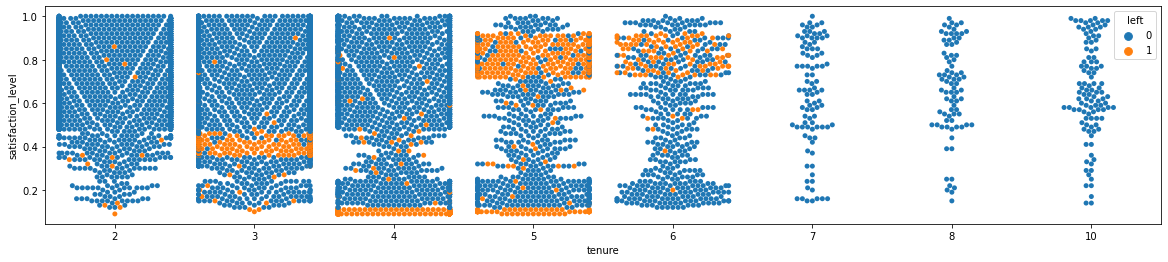

In [19]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_clean, x='tenure',y='satisfaction_level',hue='left')

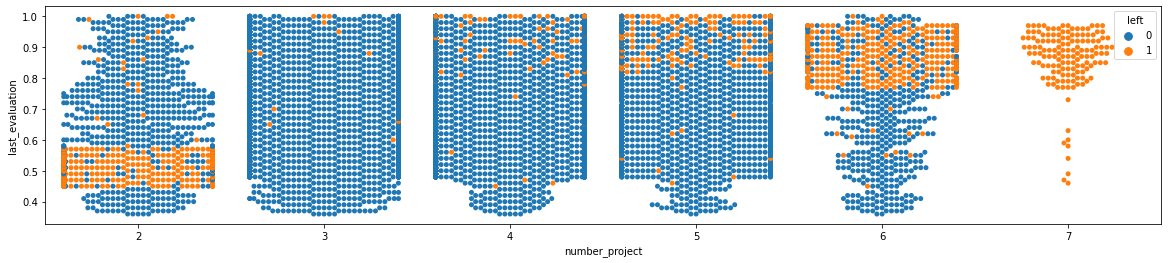

In [20]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_clean, x='number_project',y='last_evaluation',hue='left')

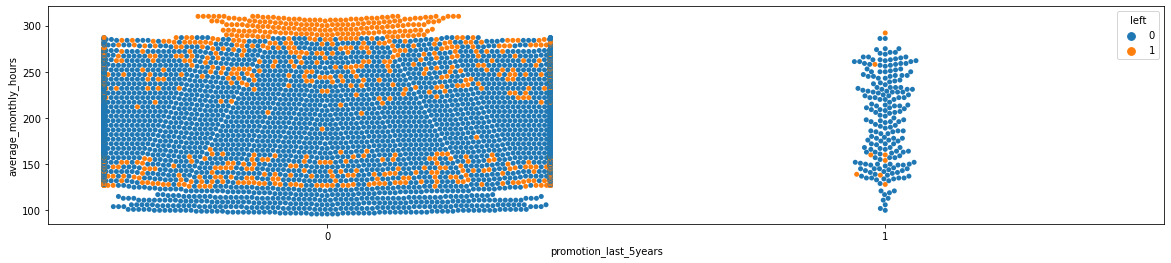

In [21]:
plt.figure(figsize=(20, 4))
sns.swarmplot(data=df_clean, x='promotion_last_5years',y='average_monthly_hours',hue='left')

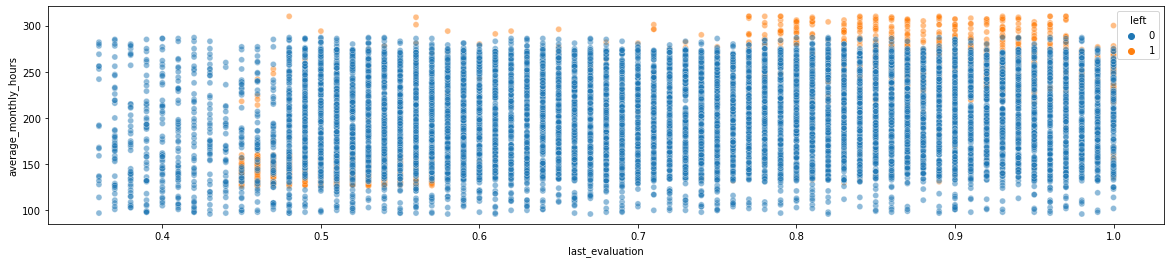

In [22]:
plt.figure(figsize=(20, 4))
sns.scatterplot(data=df_clean, x='last_evaluation',y='average_monthly_hours',hue='left',alpha=0.5)

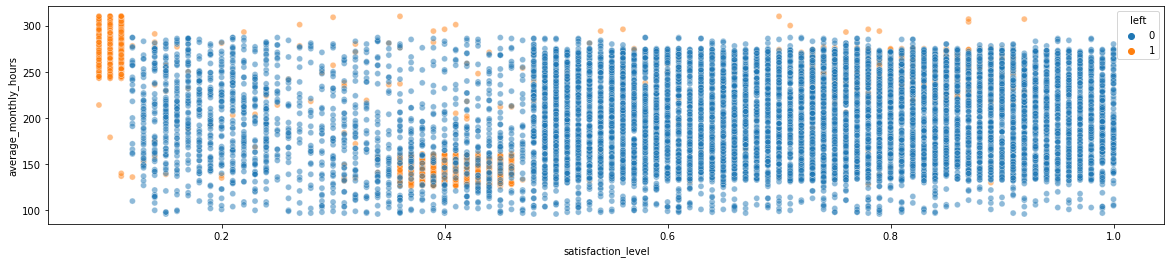

In [23]:
plt.figure(figsize=(20, 4))
sns.scatterplot(data=df_clean, x='satisfaction_level',y='average_monthly_hours',hue='left',alpha=0.5)

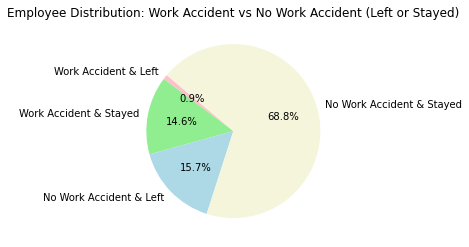

In [24]:
work_acc_left = len(df_clean[(df_clean['work_accident'] == 1) & (df_clean['left'] == 1)])
work_acc_stayed = len(df_clean[(df_clean['work_accident'] == 1) & (df_clean['left'] == 0)])
no_work_acc_left = len(df_clean[(df_clean['work_accident'] == 0) & (df_clean['left'] == 1)])
no_work_acc_stayed = len(df_clean[(df_clean['work_accident'] == 0) & (df_clean['left'] == 0)])

sizes = [work_acc_left, work_acc_stayed, no_work_acc_left, no_work_acc_stayed]
labels = ['Work Accident & Left','Work Accident & Stayed','No Work Accident & Left','No Work Accident & Stayed']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'lightgreen', 'lightblue', 'beige'])
plt.title('Employee Distribution: Work Accident vs No Work Accident (Left or Stayed)')
plt.show()

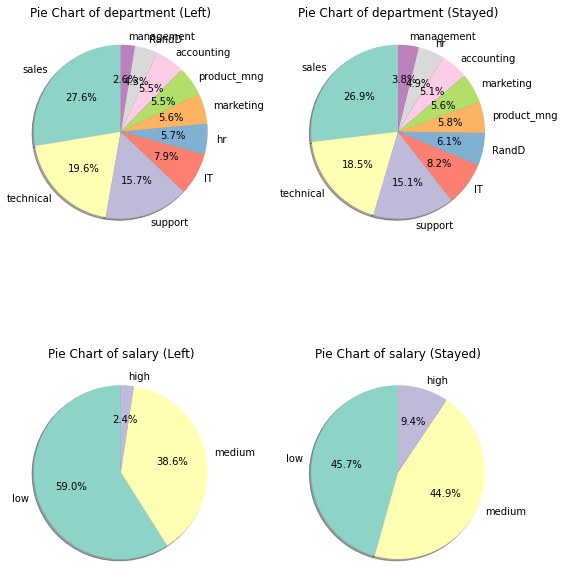

In [25]:
df_left = df_clean[df_clean['left'] == 1]
df_stayed = df_clean[df_clean['left'] == 0]

categorical_cols = df_clean.select_dtypes(include='object').columns
existing_cols = [col for col in categorical_cols if col in df_clean.columns]

fig, axes = plt.subplots(nrows=len(existing_cols), ncols=2, figsize=(8, len(existing_cols)*5))

for idx, col in enumerate(existing_cols):
    categories = df_clean[col].unique()
    palette = sns.color_palette("Set3", len(categories)) 
    value_counts_left = df_left[col].value_counts()
    axes[idx, 0].pie(value_counts_left,labels=value_counts_left.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_left)],shadow=True,labeldistance=1.1)
    axes[idx, 0].set_title(f'Pie Chart of {col} (Left)')

    value_counts_stayed = df_stayed[col].value_counts()
    axes[idx, 1].pie(value_counts_stayed,labels=value_counts_stayed.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_stayed)],shadow=True,labeldistance=1.1)
    axes[idx, 1].set_title(f'Pie Chart of {col} (Stayed)')

plt.tight_layout()
plt.show()


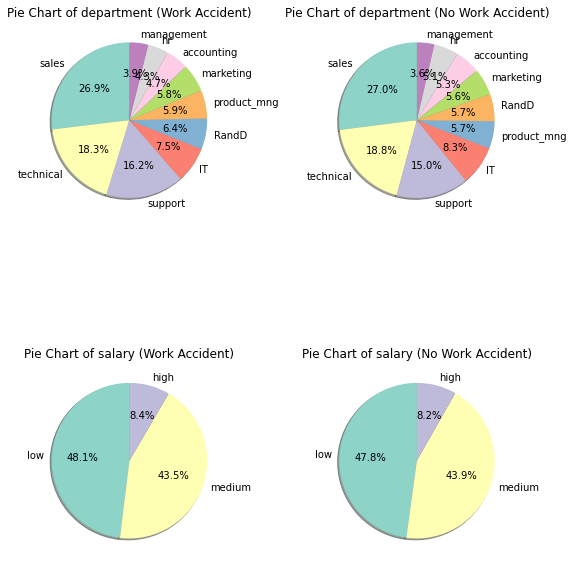

In [26]:
df_work_acc = df_clean[df_clean['work_accident'] == 1]
df_no_work_acc = df_clean[df_clean['work_accident'] == 0]

categorical_cols = df_clean.select_dtypes(include='object').columns
existing_cols = [col for col in categorical_cols if col in df_clean.columns]

fig, axes = plt.subplots(nrows=len(existing_cols), ncols=2, figsize=(8, len(existing_cols)*5))

for idx, col in enumerate(existing_cols):
    categories = df_clean[col].unique()
    palette = sns.color_palette("Set3", len(categories))

    value_counts_work_acc = df_work_acc[col].value_counts()
    axes[idx, 0].pie(value_counts_work_acc,labels=value_counts_work_acc.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_work_acc)],shadow=True,labeldistance=1.1)
    axes[idx, 0].set_title(f'Pie Chart of {col} (Work Accident)')

    value_counts_no_work_acc = df_no_work_acc[col].value_counts()
    axes[idx, 1].pie(value_counts_no_work_acc,labels=value_counts_no_work_acc.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_no_work_acc)],shadow=True,labeldistance=1.1)
    axes[idx, 1].set_title(f'Pie Chart of {col} (No Work Accident)')

plt.tight_layout()
plt.show()


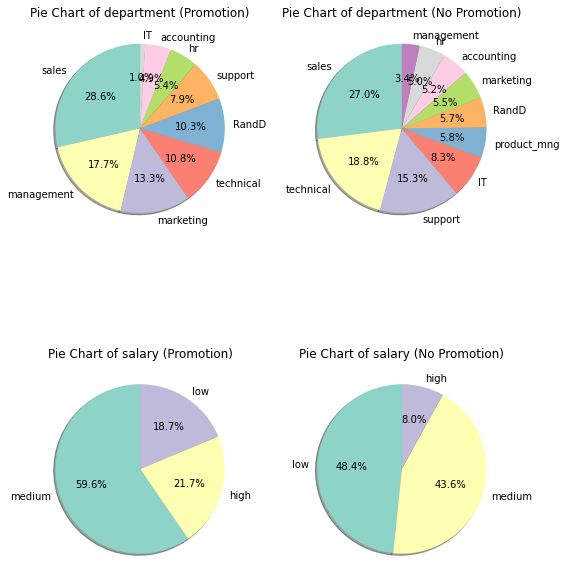

In [27]:
df_promotion = df_clean[df_clean['promotion_last_5years'] > 0]
df_no_promotion = df_clean[df_clean['promotion_last_5years'] == 0]

categorical_cols = df_clean.select_dtypes(include='object').columns
existing_cols = [col for col in categorical_cols if col in df_clean.columns]

fig, axes = plt.subplots(nrows=len(existing_cols), ncols=2, figsize=(8, len(existing_cols)*5))

for idx, col in enumerate(existing_cols):
    categories = df_clean[col].unique()
    palette = sns.color_palette("Set3", len(categories))

    value_counts_promotion = df_promotion[col].value_counts()
    axes[idx, 0].pie(value_counts_promotion,labels=value_counts_promotion.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_promotion)],shadow=True,labeldistance=1.1)
    axes[idx, 0].set_title(f'Pie Chart of {col} (Promotion)')

    value_counts_no_promotion = df_no_promotion[col].value_counts()
    axes[idx, 1].pie(value_counts_no_promotion,labels=value_counts_no_promotion.index,autopct='%1.1f%%',startangle=90,colors=palette[:len(value_counts_no_promotion)],shadow=True,labeldistance=1.1)
    axes[idx, 1].set_title(f'Pie Chart of {col} (No Promotion)')

plt.tight_layout()
plt.show()


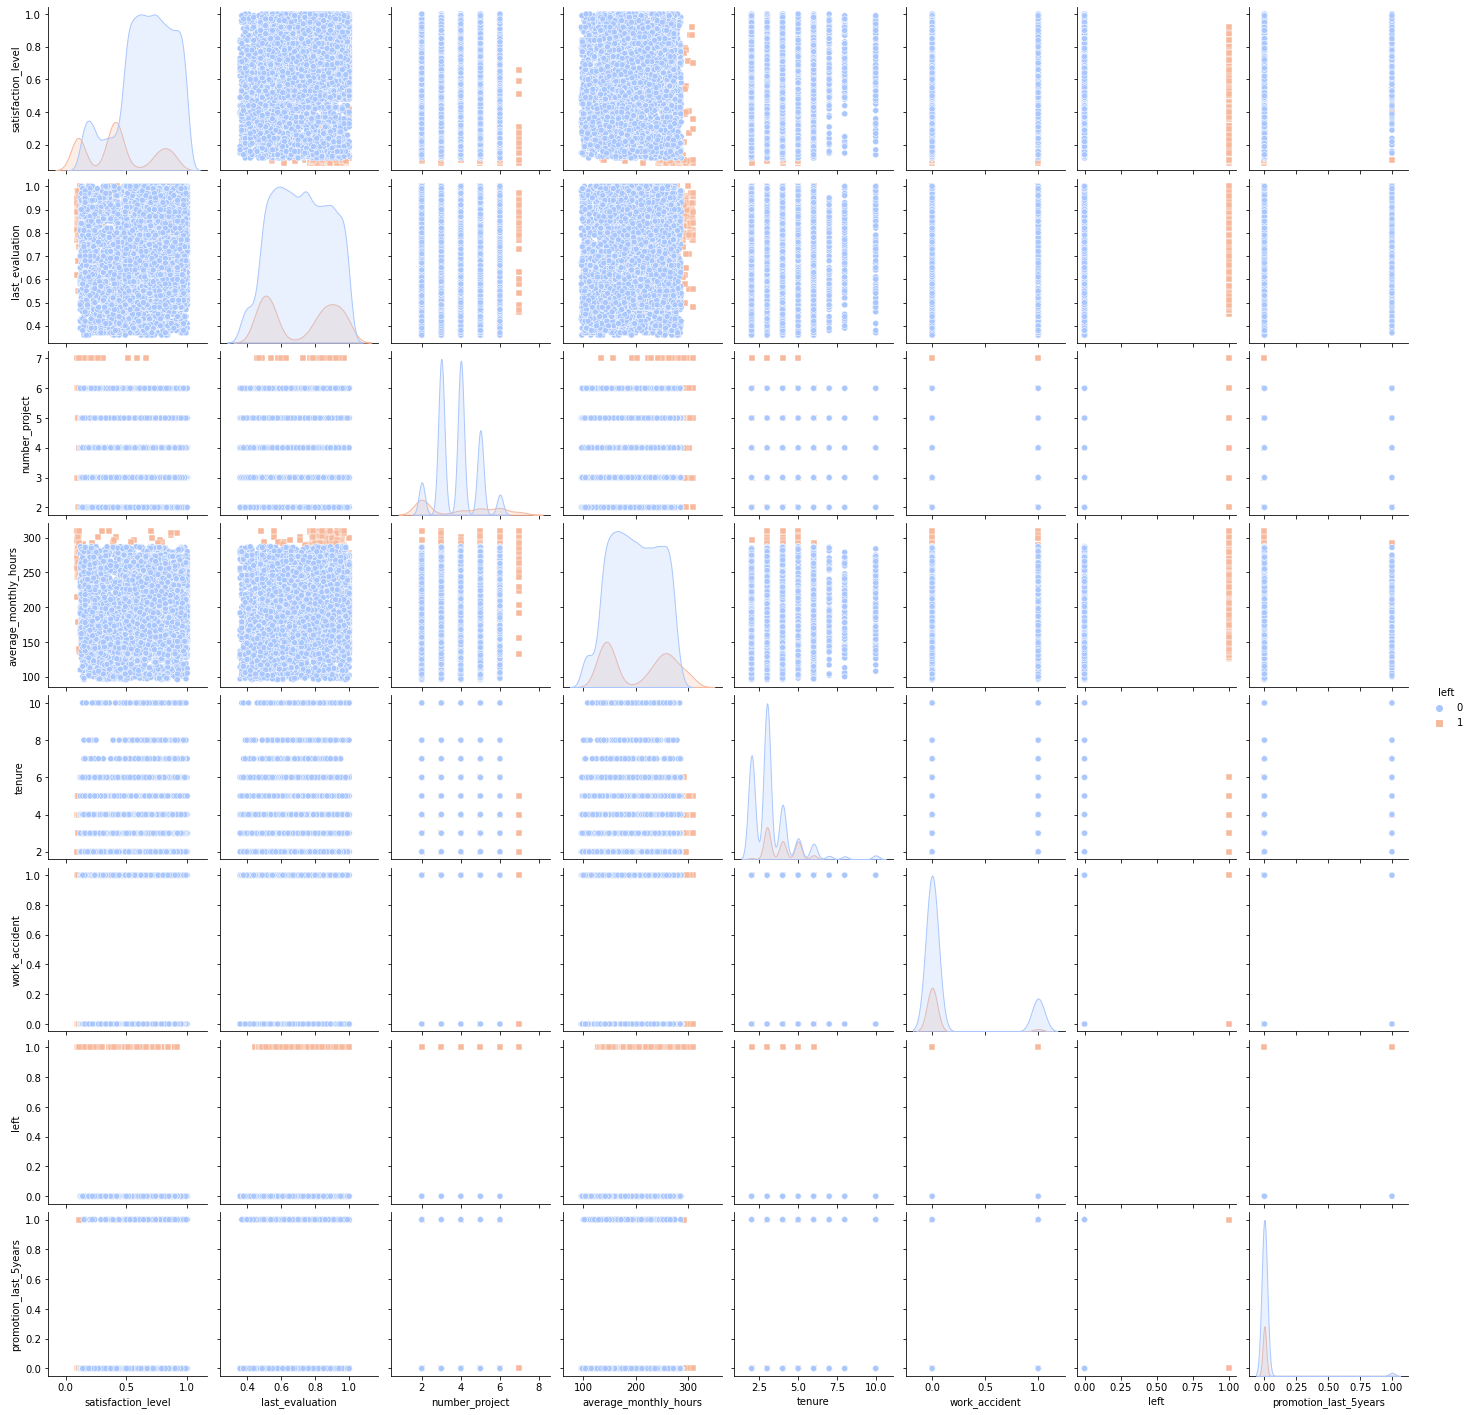

In [28]:
sns.pairplot(df_clean, hue='left', vars=df.select_dtypes(include='number').columns, palette='coolwarm', markers=["o", "s"])

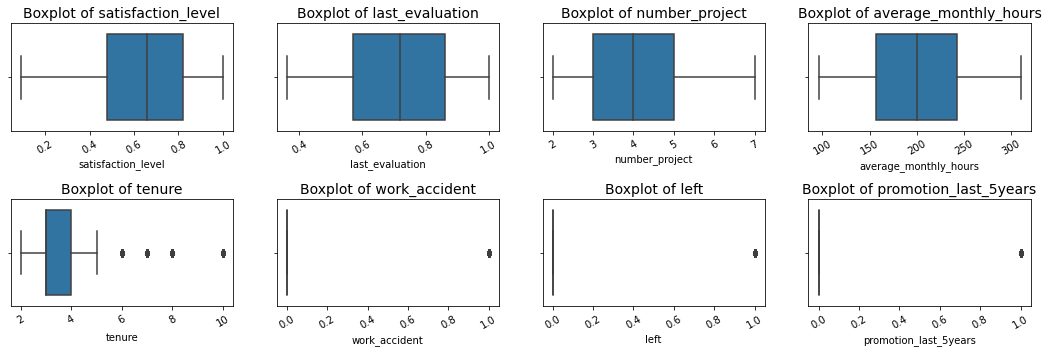

In [29]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df_clean, x=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

In [30]:
df_clean = df_clean[df_clean['tenure'] < 7]

### Insights

# **Employee Analysis at Salifort Motors**

## **1. Overview of Employee Tenure**
- **Outliers in Tenure:** A boxplot shows outliers in tenure, particularly for employees with 6+ years at the company. However, these cases are rare, and such employees are less likely to leave the company.
- **Key Observation:** Most employees have a tenure of 2-3 years, with fewer employees staying beyond 5 years.

---

## **2. Attrition Insights**
- **Skewed Attrition Rates:** Only 16.6% of employees have left the company, indicating highly skewed data. This could be due to recent data collection or generally low attrition rates.
- **Tenure-Based Attrition:** 
  - Employees with **5-6 years of tenure** left more frequently, possibly due to lack of promotions.
  - Employees with **7+ years of tenure** tend to stay and report moderate to high satisfaction.
- **Projects and Attrition:**
  - Employees with **5+ projects** have a higher likelihood of leaving, especially those handling **6-7 projects**.
  - All employees with **7 projects** have left, likely due to burnout.
- **Satisfaction and Attrition:** Employees with low satisfaction levels are more likely to leave.
- **Evaluation and Attrition:** Employees with high evaluations but no promotions also show higher attrition rates.

---

## **3. Employee Performance Metrics**
- **Satisfaction Levels:** Most employees report satisfaction levels between **0.4-1.0**, suggesting a generally positive workforce. Dissatisfied employees may have already left.
- **Last Evaluations:** Scores range between **0.5-1.0**, reflecting good performance records. Those with low evaluations are rare and likely have already left.
- **Projects Handled:** 
  - The majority of employees completed **3-5 projects.**
  - Very few completed 7+ projects, but these employees show high burnout and attrition rates.
- **Average Monthly Hours:** 
  - Most employees work **130-270 hours/month.**
  - Employees working around **300 hours/month** with no promotion are more likely to leave.

---

## **4. Departmental Insights**
- **Top Departments by Attrition:**
  - **Sales:** 27.6% of employees who left were from Sales.
  - **Tech:** 19.6%.
  - **Support:** 15.7%.
- **Top Departments by Retention:**
  - **Sales:** 26.9%.
  - **Tech:** 18.5%.
  - **Support:** 15.1%.
- **Promotion Disparity:** 
  - No promotions have been recorded in the **Product Management** department.
  - Highest promotions occurred in the **Medium Salary** group, followed by **High Salary** employees.

---

## **5. Salary and Attrition**
- **Salary Group Dynamics:**
  - **Low Salary Group (47.9% of workforce):** Accounts for 59% of employees who left.
  - **Medium Salary Group (43.9% of workforce):** Accounts for 38.6% of employees who left.
  - **High Salary Group (8.3% of workforce):** Experiences the least attrition.

---

## **6. Other Observations**
- **Work Accidents:** Only **0.9%** of employees who experienced work accidents have left the company, suggesting accidents are not a significant factor in attrition.
- **Correlation Insights:**
  - **Satisfaction vs. Attrition:** Moderate positive correlation (**0.39**) – higher satisfaction reduces attrition.
  - **Number of Projects vs. Monthly Hours:** Strong correlation (**0.42**) – more projects require more work hours.
  - **Evaluation vs. Projects and Hours:** Moderate correlations (**0.35** and **0.34**) – better evaluations align with more projects and hours worked.
  - **Promotions vs. Attrition:** Weak correlation (**0.06**) – lack of promotions slightly influences attrition.



# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Data is highly imbalanced, we need to use sampling techniques to overcome it.
2. It's a small dataset which have just 9 independent features, so we will use all features.
3. Some share linear relationship others don't. Rest of the conditions are met.
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classification

### Identify the types of models most appropriate for this task.

#### **Suitable Algorithms:**
- **Logistic Regression:** Effective for binary classification and interpretable results.
- **Decision Trees:** Provide clear rules and explainable outputs.
- **Random Forest:** Useful for handling nonlinear relationships and reducing overfitting.
- **Gradient Boosting (e.g., XGBoost, LightGBM):** Best for high performance on tabular data.


### Modeling

Add as many cells as you need to conduct the modeling process.

In [36]:
categorical_cols = df_clean.select_dtypes(include=["object", "category"]).columns
numerical_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
numerical_cols = numerical_cols.drop('left')

In [37]:
scaler = StandardScaler()
df_clean_scaled = df_clean.copy()  # Create a copy to avoid changing original df
df_clean_scaled[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [38]:
df_clean_encoded = pd.get_dummies(df_clean_scaled, columns=['salary', 'department'], drop_first=True)
df_clean_encoded


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,-1.031991,-1.108894,-1.545688,-0.893023,-0.227555,-0.424808,1,-0.122101,1,0,0,0,0,0,0,0,1,0,0
1,0.707822,0.849528,1.025116,1.261118,2.582047,-0.424808,1,-0.122101,0,1,0,0,0,0,0,0,1,0,0
2,-2.150443,0.968220,2.738985,1.466275,0.708979,-0.424808,1,-0.122101,0,1,0,0,0,0,0,0,1,0,0
3,0.376429,0.908874,1.025116,0.461009,1.645513,-0.424808,1,-0.122101,1,0,0,0,0,0,0,0,1,0,0
4,-1.073415,-1.168241,-1.545688,-0.851992,-0.227555,-0.424808,1,-0.122101,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.376429,-0.456087,0.168181,-0.174976,-0.227555,-0.424808,0,-0.122101,0,1,0,0,0,0,0,0,1,0,0
11986,-0.617750,-1.286933,1.025116,-1.200758,0.708979,-0.424808,0,-0.122101,0,1,0,0,0,0,0,0,0,0,0
11987,-1.819050,0.434105,0.168181,0.584102,0.708979,-0.424808,0,-0.122101,0,1,0,0,0,0,0,1,0,0,0
11992,-0.037812,0.790182,-0.688753,0.748228,-0.227555,2.354005,0,-0.122101,0,1,0,0,0,0,0,0,0,0,0


In [42]:
x = df_clean_encoded.drop('left', axis=1)
y = df_clean_encoded['left']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
log_reg = LogisticRegression()

In [49]:
# train Logistic Regression
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



Accuracy 0.81 %
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1937
           1       0.41      0.19      0.25       405

    accuracy                           0.81      2342
   macro avg       0.63      0.56      0.57      2342
weighted avg       0.77      0.81      0.78      2342

[[1828  109]
 [ 330   75]]


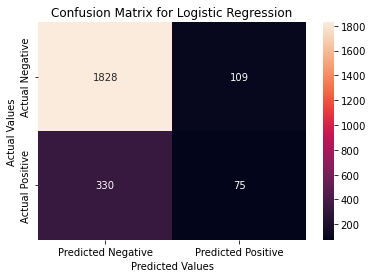

In [50]:
y_pred_log_reg = log_reg.predict(x_test)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg),2)
print('Accuracy', log_reg_accuracy,'%')

classification_rep = classification_report(y_test, y_pred_log_reg)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






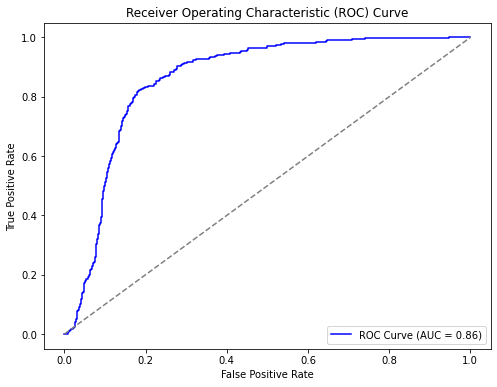

In [52]:
y_pred_prob = log_reg.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### 💭 **Reflection on the Executing Stage**

#### **1. Key Insights**
- Employees with **5-6 years of tenure** and no promotions are at the highest risk of leaving the company.  
- High workload, particularly for employees managing **6-7 projects**, leads to burnout and attrition.  
- Employees in the **low salary group** are the most likely to leave, accounting for 59% of the attrition.  
- Satisfaction levels and lack of promotions are the strongest drivers of employee churn.

#### **2. Business Recommendations**
- **Introduce a structured promotion policy:** Focus on recognizing employees with 5+ years of tenure.  
- **Manage workload better:** Redistribute projects to prevent burnout, especially for employees managing more than 5 projects.  
- **Increase employee satisfaction:** Regularly assess and address satisfaction levels through surveys and wellness programs.  
- **Retain low-salary employees:** Provide incentives, skill development opportunities, or salary adjustments to reduce attrition.  

#### **3. Suggestions for Management**
- Focus retention efforts on the **Sales, Tech, and Support departments** as they have the highest attrition rates.  
- Address the lack of promotions in the **Product Management department**.  
- Consider offering flexible work hours or reduced workloads for employees working over **300 hours per month**.

#### **4. Improving the Model**
- **Data Quality:** The dataset is highly skewed, with only 16.6% attrition cases. Collecting more balanced data would improve the model's performance.  
- **Additional Features:** Incorporating new variables like training participation, manager feedback, or location-specific data could enhance predictions.  
- **Algorithms:** Experiment with advanced ensemble methods like CatBoost or techniques like SMOTE for handling imbalanced datasets.

#### **5. Additional Questions**
- What specific factors contribute to high satisfaction levels in employees who stay?  
- Can we predict which departments or roles are at risk of burnout?  
- How do training programs or leadership styles impact employee retention?

#### **6. Resources Used**
- **Python Libraries:** Pandas, Scikit-learn, Matplotlib, Seaborn

#### **7. Ethical Considerations**
- **Bias in Data:** Employees from certain departments or salary groups may be overrepresented, leading to biased predictions.  
- **Privacy Concerns:** Employee data must be handled securely, and sensitive information like salary should not be exposed unnecessarily.  
- **Fairness:** The model should be evaluated to ensure it doesn’t unfairly disadvantage specific groups based on gender, age, or other attributes.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

### **Model Results Summary**

- **Model Type:** Logistic Regression  
- **Accuracy:** 81%  
- **ROC-AUC Score:** 86%  

#### **Performance Highlights:**
- Class 0 (Did Not Leave): High precision (0.85) and recall (0.94).  
- Class 1 (Left): Low precision (0.41) and recall (0.19).  

#### **Key Observations:**
- The model performs well in predicting employees who stayed but struggles with identifying those who left due to class imbalance.  
- High false negatives indicate many employees who left are being misclassified.  



### **Conclusion**
The logistic regression model achieved an accuracy of **81%** and a **ROC-AUC score of 86%**, indicating a good overall performance. However, the model struggled to identify employees likely to leave, with a low recall of **19%** for the "left" class. This suggests a bias toward the majority class (employees who stayed), likely due to class imbalance in the dataset.

### **Recommendations**
1. **Retention Strategies:**
   - Focus on employees with **5+ years of tenure** and **low satisfaction levels**, as they are at a higher risk of leaving.
   - Implement measures to prevent burnout for employees handling **6+ projects** or working **300+ hours per month**.
   - Improve promotion policies, particularly for employees in **Product Management**.

2. **Model Improvement:**
   - Address class imbalance using techniques like **SMOTE** or **class weighting**.
   - Explore advanced models such as **Random Forest** or **Gradient Boosting** to improve prediction for the minority class.
   - Fine-tune the decision threshold to balance precision and recall for "left."

3. **Data Enhancement:**
   - Collect additional features such as employee feedback, training participation, or workload trends to improve predictive power.
   - Gather more data to address the imbalance and capture patterns from recent employee departures.

### **Next Steps**
1. **Model Refinement:**
   - Retrain the model with techniques to handle class imbalance.
   - Experiment with ensemble methods like **XGBoost** or **LightGBM** for better performance.

2. **Further Analysis:**
   - Conduct detailed department-level attrition analysis to identify high-risk teams.
   - Assess the impact of salary adjustments and promotion policies on retention.

3. **Stakeholder Collaboration:**
   - Share insights with HR and management to guide employee retention strategies.
   - Develop dashboards for real-time tracking of satisfaction, promotions, and workload trends.

4. **Deployment:**
   - Integrate the refined model into HR systems for proactive monitoring of attrition risks.
   - Establish periodic reviews to update the model and incorporate new data.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.